In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tqdm import trange
from dataclasses import dataclass
import csv

In [2]:
from module import *

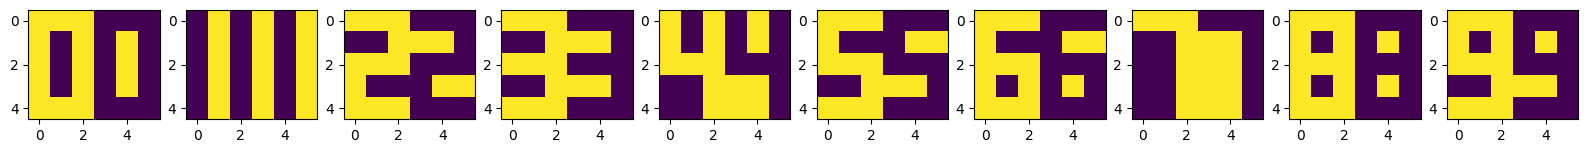

In [3]:
data_rows = {
    "e":  {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1},
    "r":  {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0},
    "c":  {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1},
    "cr": {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0},
    "l":  {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1},
    "lr": {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0},
    "lc": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1},
    "f":  {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0},
    "off":{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
}
numbers = {
    0: "f lr lr lr f",
    1: "c c c c c",
    2: "f r f l f",
    3: "f r f r f",
    4: "lr lr f r r",
    5: "f l f r f",
    6: "f l f lr f",
    7: "f r r r r",
    8: "f lr f lr f",
    9: "f lr f r f",
}
empty = np.array([[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]])

numbers_rows = {k: [data_rows[vv] for vv in v.split(" ")] for k, v in numbers.items()}

fig, axs = plt.subplots(1, 10, figsize=(20,20))
for ax, n in zip(axs, numbers_rows.values()):
    ax.imshow(pd.DataFrame(n).values)

In [4]:
def draw_network(net):
    import networkx as nx
    edges = []
    pos = {}
    n_in = {}
    for node, (_, priority, listen, cast, __) in net.nodes.iterrows():
        if listen is not None:
            try:
                iter(listen)
            except:
                listen = [listen]
            for l in listen:
                edges.append((l, node))
        if cast is not None:
            try:
                iter(cast)
            except:
                cast = [cast]
            for c in cast:
                edges.append((node, c))
        if priority not in n_in:
            n_in[priority] = 0
        pos[node] = (priority, n_in[priority])
        n_in[priority] += 0.5
    G = nx.DiGraph()
    G.add_edges_from(edges)
    plt.figure(figsize=(15,15))
    options = {
        "font_size": 12,
        "node_size": 300,
        "node_color": "white",
        "edgecolors": "blue",
        "linewidths": 2,
        "width": 2,
        "connectionstyle": 'arc3, rad = 0.3'
    }
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    nx.draw_networkx(G, pos, **options)
    plt.show()

In [5]:
params_dendrites = {
    "tau_leak": 1, 
    "tau_inhibitory": 1,
    "tau_refractory": 6,
    "tau_ltp": 5, 
    "thres": 1000,
    "ainc": 5, 
    "adec": -1, 
    "wmax": 255, 
    "wmin": 1,
    "learning": True,
    "wta": True,
    "layer_type": "ttron"
}

net = SpikeNetworkSim(inputs_l=6, dt=1)
dendrites = [
    {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 280, 1: 240},
            1: {0: 0, 1: 0},
            2: {0: 280, 1: 240},
            3: {0: 240, 1: 240},
            4: {0: 270, 1: 255},
            5: {0: 0, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 230, 1: 230},
            1: {0: 0, 1: 230},
            2: {0: 0, 1: 230},
            3: {0: 0, 1: 0},
            4: {0: 230, 1: 0},
            5: {0: 230, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 300, 1: 270},
            1: {0: 0, 1: 270},
            2: {0: 0, 1: 270},
            3: {0: 0, 1: 0},
            4: {0: 300, 1: 0},
            5: {0: 300, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 0, 1: 240},
            1: {0: 255, 1: 255},
            2: {0: 0, 1: 200},
            3: {0: 255, 1: 255},
            4: {0: 200, 1: 0},
            5: {0: 200, 1: 255},
        }
    }, 
]
teacher_nodes = net.ttron_layer([d["connections"] for d in dendrites], **params_dendrites)

In [24]:
seq_data = []
seq_labels = []
a = None
for n in range(100):
        a = np.random.randint(10)
        seq_data+=[x.copy() for x in numbers_rows[a]]
        seq_labels+=[a for _ in numbers_rows[a]]
        for i in range(5):
            seq_labels.append(-1)
            seq_data.append(data_rows["off"].copy())

genome = {}
for x in np.unique(seq_labels):
    genome[x] = np.random.randint(len(teacher_nodes))
d_p = seq_labels[0]
for i, d in enumerate(seq_labels):
    seq_data[i].update({k:0 for k in teacher_nodes})
    if d != d_p:
        seq_data[i][teacher_nodes[genome[d]]] = 1
        d_p = d

In [34]:
net.weights

,weights,inhibited
25,"[255, 59, 157, 137, 176, 6, 7, 197, 163, 200, ...",-1
32,"[1, 135, 58, 85, 49, 229, 38, 92, 133, 181, 15...",-1
39,"[4, 16, 16, 210, 186, 106, 193, 223, 173, 229,...",-1
46,"[12, 42, 252, 184, 113, 155, 77, 46, 229, 181,...",-1


In [35]:
s = net.stepwise_generator(pd.DataFrame(seq_data, columns=net.nodes.index).fillna(0).values)

In [36]:
out = pd.DataFrame([x for x in s])

In [37]:
net.weights

,weights,inhibited
25,"[255, 59, 157, 137, 176, 6, 7, 197, 163, 200, ...",-1
32,"[1, 135, 58, 85, 49, 229, 38, 92, 133, 181, 15...",-1
39,"[4, 16, 16, 210, 186, 106, 193, 223, 173, 229,...",-1
46,"[8, 42, 252, 184, 113, 155, 77, 46, 229, 181, ...",-1


In [29]:
from ipywidgets import SelectMultiple, Select, Button, HBox, VBox, Output, IntRangeSlider, Checkbox, Accordion
def update_graph(b):
    fig, ax = plt.subplots(figsize=(8,8))
    s = np.concatenate(([x.value for x in select_nodes]))
    if np.isin('---', s):
        s = s[np.where(s != '---')].astype(int)
    for n in s:
        t = out.index.tolist()
        ax.step(t, out[n])
    ax.set_xlim(xw.value)
    ax.legend([f"{int(n)}/{net.labels_dict[int(n)]}" if n != net.labels_dict[n] else int(n) for n in s])
    with graph:
        graph.clear_output()
        display(plt.show())
        
    
graph = Output()
layer_select = Select(
    options=net.layers.layer.unique(),
    value=-1,
    description='Слой'
)

type_chboxs = []
for t in net.nodes.type.unique():
    type_chboxs.append(Checkbox(
        value=True,
        description=t,
        disabled=False
    ))
select_nodes = []
for t in type_chboxs:
    v = t.value
    if v:
        select_nodes.append(
            SelectMultiple(
                options=np.insert(np.array(net.nodes.query(f"type=='{t.description}'").index.tolist(),dtype=object), 0, '---'),
                description=t.description
            )
        )
        select_nodes[-1].rows = min(len(select_nodes[-1].options), 10)
        
def on_layer_change(change):
    select_nodes = []
    for t in type_chboxs:
        v = t.value
        if v:
            select_nodes.append(
                SelectMultiple(
                    options=np.insert(np.array(net.nodes.query(f"type=={t.description}").index.tolist(),dtype=object), 0, '---'),
                    description=t.description
                )
            )
            select_nodes[-1].rows = min(len(select_nodes[-1].options), 10)
            
layer_select.observe(on_layer_change, names='value')

xw = IntRangeSlider(
    min=out.index.min(),
    max=out.index.max(),
    value=(out.index.min(), out.index.max()),
    description='Окно просмотра',
    disabled=False
)
select = Accordion(children=[VBox(type_chboxs), VBox(select_nodes)])
select.selected_index=1
select.set_title(0, 'Типы')
select.set_title(1, 'Ноды')
xw.observe(update_graph, names='value')
[x.observe(update_graph, names='value') for x in select_nodes]
draw = Button(description='Draw')
draw.on_click(update_graph)
HBox((VBox((xw,select,draw)), graph))